<a href="https://colab.research.google.com/github/leandrorodor/PGR-IESB-P9043-CDNA-20203/blob/main/projeto_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

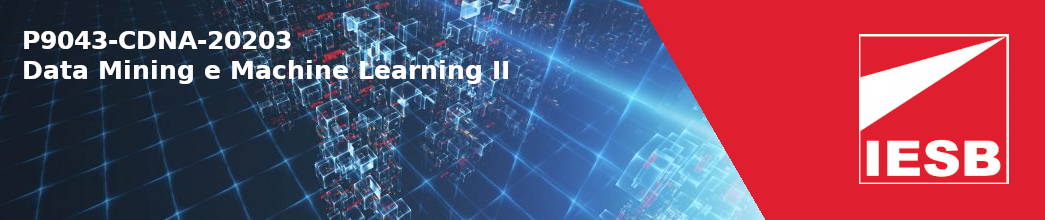

In [ ]:
from IPython.display import Image
Image('/content/sample_data/banner_iesb_pos_colab_dmmlii.png')

## Projeto final

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline


from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

### Importação e visualização dos dados

In [2]:
# Carrega dataset de treino e exibe 5 primeiras linhas

train = pd.read_csv("/content/sample_data/train.csv")
train.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
# Tipo de dados
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [5]:
# Shape
train.shape

(9557, 143)

In [7]:
# Localiza colunas (features) com valores ausentes
train.isnull().sum(axis=0).sort_values(ascending = False).head(5)

rez_esc      7928
v18q1        7342
v2a1         6860
meaneduc        5
SQBmeaned       5
dtype: int64

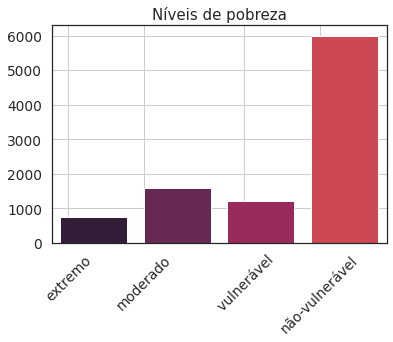

In [9]:
def class_distribution(train):
    # Diferentes tipos de níveis de pobreza
    sns.set(style="white",font_scale=1.25)
    sns.set_palette("rocket")

    ax = sns.countplot(data= train, x = 'Target')

    #setting the labels on x-axis
    plt.xticks([-0.3,0.6,1.8,2.7],['extremo', 'moderado', ' vulnerável', 'não-vulnerável'], rotation = 45)
    plt.xlabel("")
    plt.ylabel("")
    plt.grid('True')
    
    #set the title 
    plt.title('Níveis de pobreza');
    
class_distribution(train)

### Limpeza de dados

In [10]:
# Corrigindo as instâncias classificadas incorretamente, todos os membros de uma determinada família devem ter o mesmo nível de pobreza

# Encontrando domicílios em que todos os membros da família têm os mesmos níveis de pobreza
household_unique = train.groupby('idhogar')['Target'].nunique() == 1

# Encontrando domicílios em que todos os membros da família não têm os mesmos níveis de pobreza
household_not_unique = household_unique[household_unique != True ]

# Corrigindo a classificação
for family in household_not_unique.index:
    # Seleção d aatual classificação
    actual_label = int(train[(train['idhogar'] == family) & (train['parentesco1'] == 1)]['Target'])
    # Correção da classificação
    train.loc[train['idhogar'] == family, 'Target'] = actual_label

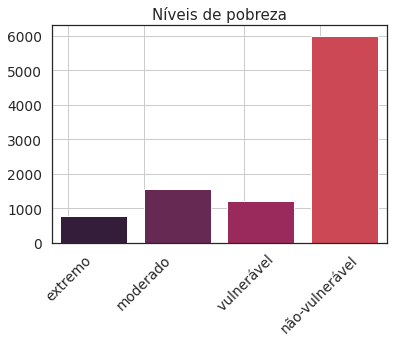

In [11]:
# Verificando a distribuição da classe depois de correção da classificação
class_distribution(train)

### Imputação de valores

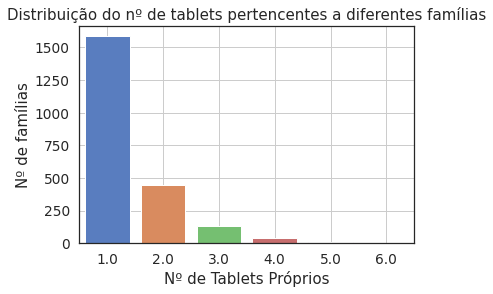

In [18]:
# v18q1: indica o número de tablets que a família possui e depende da v18q, que indica se uma família possui um tablet
# Plotando gráfico para o número de tablets
sns.set(style="white", font_scale=1.25)
sns.set_palette("muted")
ax = sns.countplot(data = train, x = 'v18q1')
plt.title("Distribuição do nº de tablets pertencentes a diferentes famílias")
plt.xlabel("Nº de Tablets Próprios")
plt.ylabel("Nº de famílias");
plt.grid("True")